In [1]:
import os
from PIL import Image
import numpy as np

def process_images(folder_path, output_folder, error_file_path):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    failed_files = []  # List to store names of files that couldn't be processed
    i = 1

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if i % 10 == 0:
            print(i)
        i += 1
        file_path = os.path.join(folder_path, filename)
        # Get the file extension
        ext = os.path.splitext(filename)[1].lower()
        
        # Check file format and process accordingly
        if ext in ['.png', '.bmp', '.tif', '.tiff']:
            # Generate output file path
            output_file_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.png')
            try:
                # Open the image
                with Image.open(file_path) as img:
                    # If the TIFF file is in 'I;16' or 'I;16B' mode
                    if ext in ['.tif', '.tiff'] and img.mode in ['I;16', 'I;16B']:
                        # Convert image data to a numpy array
                        img_array = np.array(img)

                        # Normalize to 0-255 using fixed maximum and minimum values
                        normalized_img_array = (img_array - 0) / 65535 * 255
                        normalized_img_array = normalized_img_array.astype(np.uint8)

                        # If the image is grayscale, convert to three channels
                        if len(img_array.shape) == 2:
                            img_array = np.stack((img_array,)*3, axis=-1)

                        # Create a new PIL image from array
                        img = Image.fromarray(normalized_img_array, 'L').convert('RGB')
                    else:
                        # Convert other formats or already RGB mode TIFFs
                        img = img.convert('RGB')
                    # Save as PNG
                    img.save(output_file_path)
                    print(f"Processed and saved: {output_file_path}")
            except IOError:
                # If the image cannot be opened, add the filename to the list
                failed_files.append(filename)
                print(f"Failed to process {filename}")

    # After processing all files, save the list of unprocessable file names to disk
    if failed_files:
        np.save(error_file_path, np.array(failed_files))
        print(f"Saved failed file names to {error_file_path}")

In [75]:
original_path = '/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Training/images'
save_path = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images'
failed_file = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/failed_files.npy'
process_images(original_path, save_path, failed_file)

Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00344.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00194.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00852.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00373.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00648.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00323.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00716.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00463.png
Processed and saved: /home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00

In [62]:
original_path = '/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Tuning/images'
save_path = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/val/images'

process_images(original_path, save_path)

10
20
30
40
50
60
70
80
90
100


In [7]:
from PIL import Image
import numpy as np

def image_to_array(file_path):
    # Open the image file
    img = Image.open(file_path)
    # Convert the image to a numpy array
    img_array = np.array(img)
    return img_array

# Replace 'path_to_your_image.png' with the path to your PNG file
img_array = image_to_array('/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00246.png')
print(img_array)
print(np.max(img_array))
print(np.min(img_array))


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
1
0


In [11]:
from PIL import Image

def print_tiff_tags(filename):
    # Open TIFF file
    with Image.open(filename) as img:
        # Print basic information
        print("Format:", img.format)
        print("Mode:", img.mode)
        print("Size:", img.size)
        print("Resolution:", img.info.get('dpi', 'None'))
        
        # Print all TIFF tags
        print("TIFF Tags:")
        if hasattr(img, "tag"):
            for tag, value in img.tag.items():
                print(f"  {tag}: {value}")
        elif hasattr(img, "tag_v2"):
            for tag, value in img.tag_v2.items():
                print(f"  {tag}: {value}")

In [12]:
p = '/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Training/images/cell_00245.tif'
print_tiff_tags(p)
img = Image.open(p)
img = np.array(img)
img
print(np.max(img))
print(np.min(img))

Format: TIFF
Mode: I;16
Size: (1608, 1608)
Resolution: None
TIFF Tags:
  256: (1608,)
  257: (1608,)
  258: (16,)
  259: (1,)
  262: (1,)
  296: (1,)
  270: ('{"shape": [1608, 1608]}',)
  273: (256,)
  305: ('tifffile.py',)
  277: (1,)
  278: (1608,)
  279: (5171328,)
  282: ((1, 1),)
  283: ((1, 1),)
301
100


In [11]:
from PIL import Image

def convert_tiff_to_png(tiff_path, png_path):
    # Open the TIFF file
    with Image.open(tiff_path) as img:
        # Convert image to 'L' mode (grayscale) if it is not already
        if img.mode != 'L':
            img = img.convert('L')
        # Save the image as PNG
        img.save(png_path, 'PNG')

# Specify the path to your TIFF file and the output PNG file
convert_tiff_to_png('/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Tuning/images/cell_00071.tif', '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/val/images/cell_00071.png')

In [26]:
from PIL import Image
import numpy as np

def convert_tiff_to_png(tiff_path, png_path):
    # Open TIFF file
    with Image.open(tiff_path) as img:
        # Convert image data to numpy array
        img_array = np.array(img)

        # Normalize to 0-255 based on a fixed maximum and minimum value
        # Note: No check for division by zero error here, as it assumes a fixed maximum value of 65535
        normalized_img_array = (img_array - 0) / 65535 * 255
        normalized_img_array = normalized_img_array.astype(np.uint8)

        # Create a new PIL image from the array
        normalized_img = Image.fromarray(normalized_img_array, 'L')

        # Save the image in PNG format
        normalized_img.save(png_path, 'PNG')

# Example file paths (replace according to actual situation)
for i in [71, 72, 73, 74, 75, 76, 77, 78]:
    p1 = '/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Tuning/images/cell_000' + str(i) + '.tif'
    p2 = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/val/images/cell_000' + str(i) + '.png'
    convert_tiff_to_png(p1, p2)
i = 100
p1 = '/home/icb/hanyi.zhang/NeurIPS22-CellSeg/Tuning/images/cell_00' + str(i) + '.tif'
p2 = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/val/images/cell_00' + str(i) + '.png'
convert_tiff_to_png(p1, p2)


In [3]:
f = np.load('/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/failed_files.npy')

In [19]:
f

array(['cell_00502.tif', 'cell_00315.tiff', 'cell_00313.tiff',
       'cell_00312.tiff', 'cell_00308.tiff', 'cell_00305.tiff',
       'cell_00311.tiff', 'cell_00310.tiff', 'cell_00306.tiff',
       'cell_00303.tiff', 'cell_00307.tiff', 'cell_00309.tiff',
       'cell_00301.tiff', 'cell_00314.tiff', 'cell_00501.tif',
       'cell_00316.tiff', 'cell_00505.tif', 'cell_00304.tiff',
       'cell_00503.tif', 'cell_00506.tif', 'cell_00507.tif',
       'cell_00302.tiff', 'cell_00504.tif'], dtype='<U15')

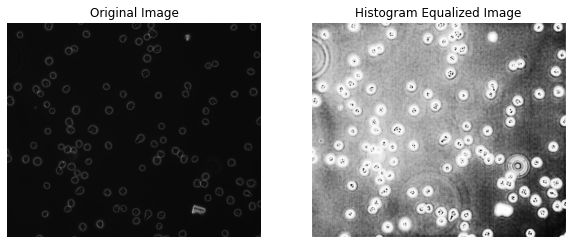

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00502.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale mode

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()


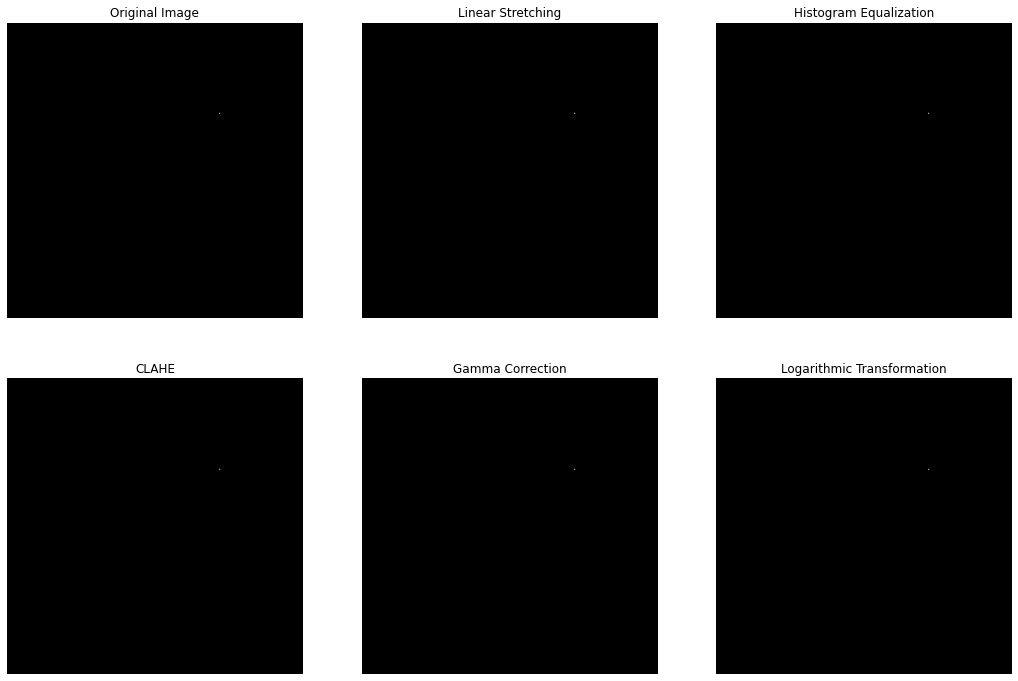

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image_path = '/home/icb/hanyi.zhang/main_master_thesis/NeurIPS22-CellSeg-png/train/images/cell_00247.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to perform linear stretching
def linear_stretch(image, min_val, max_val):
    new_min, new_max = 0, 65535
    stretched_img = (image - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    stretched_img = np.clip(stretched_img, new_min, new_max)
    return stretched_img.astype(np.uint16)

# Apply linear stretching
stretched_img = linear_stretch(img, 0, 1)

# Histogram Equalization
equalized_img = cv2.equalizeHist(img)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

# Gamma Correction
gamma = 0.5
gamma_corrected_img = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

# Logarithmic Transformation
c = 255 / np.log(1 + np.max(img))
log_transformed_img = c * np.log(1 + img)
log_transformed_img = np.array(log_transformed_img, dtype=np.uint8)

# Plotting all the images
titles = ['Original Image', 'Linear Stretching', 'Histogram Equalization', 'CLAHE', 'Gamma Correction', 'Logarithmic Transformation']
images = [img, stretched_img, equalized_img, clahe_img, gamma_corrected_img, log_transformed_img]

plt.figure(figsize=(18, 12))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
